<a href="https://colab.research.google.com/github/sabinnmc/machine_learning_n_image_classification/blob/main/UMAP_vs_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# load mnist_784 data
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)
x,y = mnist["data"], mnist["target"]
X = x.astype("float32")
Y = y.astype("int")
print(Y.dtype)
print(X.dtype)


int64
float32


In [4]:
# standardize data for 2 d planer conversion
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.dtype)
# conversion from 784 to 128 dimesnsion
pca = PCA(n_components = 128)
x_pca = pca.fit_transform(X_scaled)
print("____________784 dimension converted to 128 dimension data are:______________ ")
print(x_pca)

float32
____________784 dimension converted to 128 dimension data are:______________ 
[[-8.9171982e-01 -4.9297113e+00 -9.3038410e-02 ... -4.6583524e-01
  -1.0306233e+00 -1.5174544e+00]
 [ 8.8135281e+00 -7.5175610e+00 -3.7141843e+00 ...  5.7445669e-01
   3.2171798e-01 -4.8365876e-01]
 [ 2.2048357e+00  9.8244600e+00 -5.7524867e+00 ... -2.5859725e-01
   4.7962638e-03 -7.0514113e-01]
 ...
 [-5.2225962e+00 -1.1843148e+00 -4.7547255e+00 ... -5.0611442e-01
   4.9019009e-01  6.6351521e-01]
 [-2.1777279e+00 -6.9950304e+00 -3.2287376e+00 ...  1.1138847e+00
  -3.3209772e+00  3.1453457e+00]
 [ 1.1777874e+01 -5.4029813e+00  2.3227260e+00 ...  5.5485606e-01
  -1.1117046e+00 -2.0884631e+00]]


In [5]:
# calculating a explained variance
explained_variance = np.sum(pca.explained_variance_ratio_) * 100
print(f" explained variance with 128 D : {explained_variance:.3f}")

# calculating 128 dimension to 10 dimension reduction using t-SNE
print("___________using t-SNE for dimension reduction from 128D to 10D___________\n")
subsample = 50000
indices = np.random.choice(x_pca.shape[0], subsample, replace = False)
x_pca_sampled = x_pca[indices]
y_sampled = Y[indices]

tsne = TSNE(n_components = 2, perplexity = 30, learning_rate = 'auto', random_state = 42)
x_tsne = tsne.fit_transform(x_pca_sampled)
print(x_tsne)
print(x_tsne.shape)

 explained variance with 128 D : 76.355
___________using t-SNE for dimension reduction from 128D to 10D___________

[[ 57.735214  -52.46289  ]
 [ 85.235565    2.27182  ]
 [-19.284996   60.68624  ]
 ...
 [ -2.649819  -65.57872  ]
 [  5.2071548  -5.0728645]
 [-79.57583    -7.844431 ]]
(50000, 2)


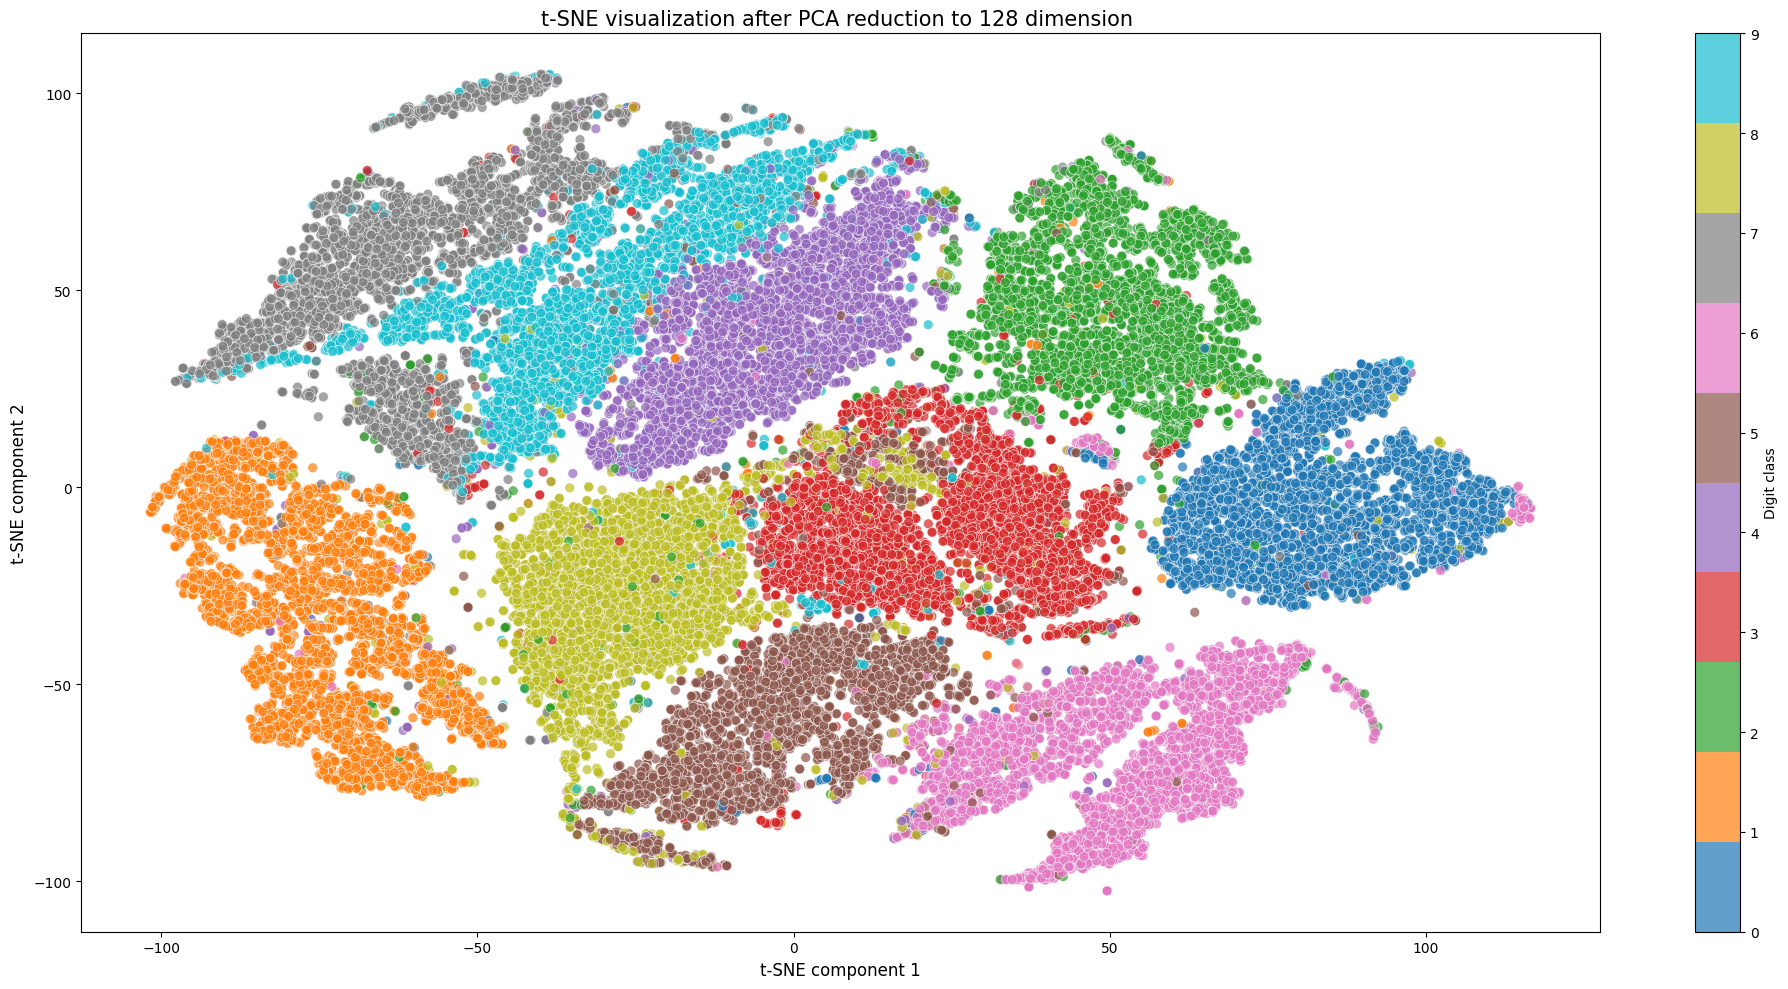

In [6]:
# creating a visualization
plt.figure(figsize = (20, 10))
scatter = plt.scatter(x_tsne[:, 0], x_tsne[:, 1],c = y_sampled, cmap = 'tab10',
                      alpha = 0.7, s = 50, edgecolors = 'w', linewidths = 0.5)
plt.colorbar(scatter, label = 'Digit class')
plt.title('t-SNE visualization after PCA reduction to 128 dimension ', fontsize = 15)
plt.xlabel('t-SNE component 1', fontsize = 12)
plt.ylabel('t-SNE component 2', fontsize = 12)
plt.tight_layout()
plt.show()

In [ ]:
# creating a visualization
plt.figure(figsize = (20, 10))
scatter = plt.scatter(x_tsne[:, 0], x_tsne[:, 1],c = y_sampled, cmap = 'tab10',
                      alpha = 0.7, s = 50, edgecolors = 'w', linewidths = 0.5)
plt.colorbar(scatter, label = 'Digit class')
plt.title('t-SNE visualization after PCA reduction to 128 dimension ', fontsize = 15)
plt.xlabel('t-SNE component 1', fontsize = 12)
plt.ylabel('t-SNE component 2', fontsize = 12)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


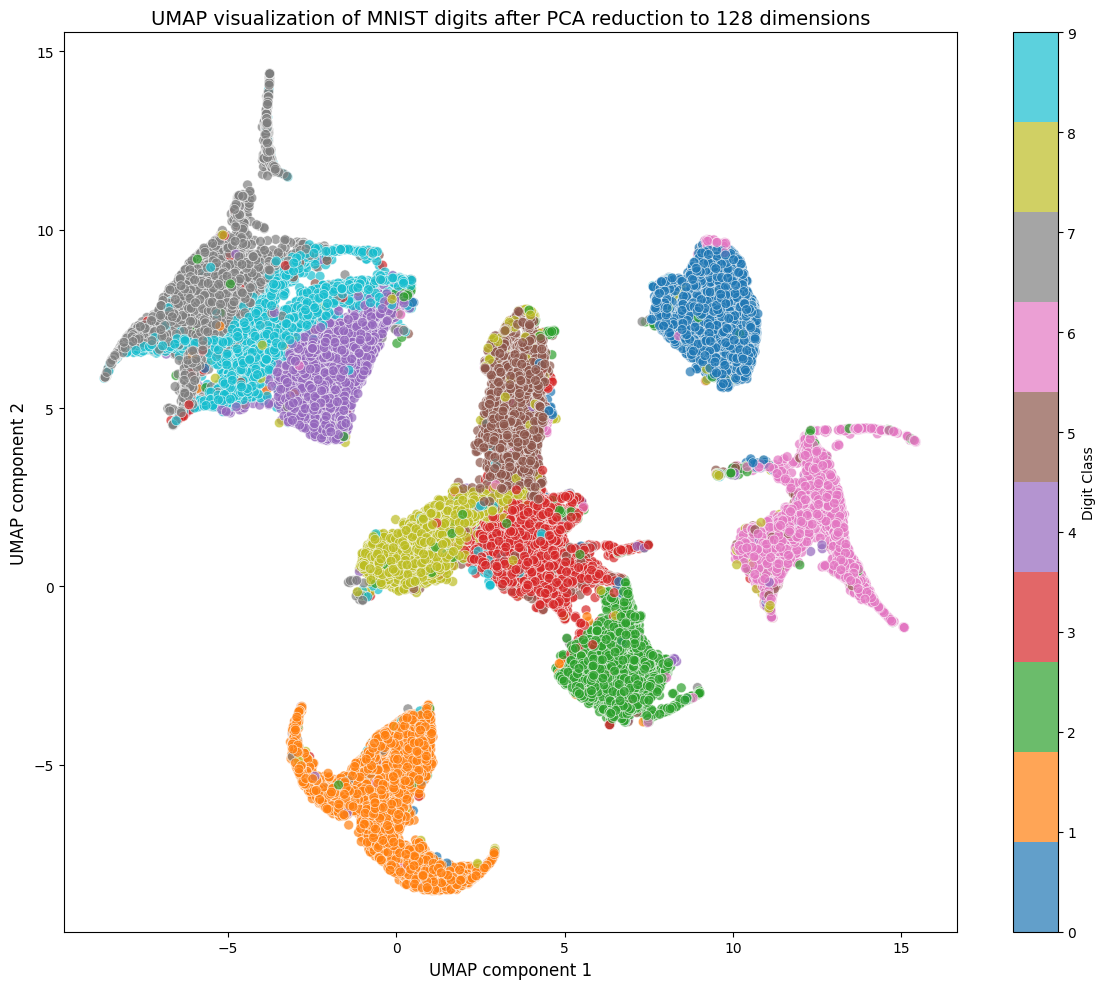

In [9]:

# Alternatively, use UMAP instead of t-SNE
from umap import UMAP
umap_model = UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(x_pca_sampled)
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_sampled, cmap='tab10',
                      alpha=0.7, s=50, edgecolors='w', linewidths=0.5)
plt.colorbar(scatter, label='Digit Class')
plt.title('UMAP visualization of MNIST digits after PCA reduction to 128 dimensions', fontsize=14)
plt.xlabel('UMAP component 1', fontsize=12)
plt.ylabel('UMAP component 2', fontsize=12)
plt.tight_layout()
plt.show()